<h1 align='center'><b><font color='indianred'></p>Spam Detection HW</b></h1>

<font color = 'indianred' size = 4 >**Read complete instructions before starting the HW** </font>


# <font color='indianred'> **Q1: Load the dataset  (1 Point)**

- For this Hw you will usespam dataset from kaggle which can be found from [this](https://www.kaggle.com/uciml/sms-spam-collection-dataset) link. You can download this data and either upload it in google drive or in colab workspace. Load the data in pandas dataframe.

- There are only two useful columns. These columns are related to (1) label (ham and spam) and the (2) text of email.

- Rename columns as label and message

- Find the %  ham amd spam in the data.





# <font color='indianred'> **Q2 : Provide the metric for evaluating model (1 Point)**</font>

As you will notice, the  data is highly imbalanced (most messages are labelled as ham and only few are labelled as spam). Always predicting ham will give us very good accuracy (close to 90%). So you need to choose a different metric.

Task: Provde the metric you will choose to evaluate your model. Explain why this is an appropriate metric for this case.

# <font color='indianred'> **Q3 : Classification Pipelines (18 Points)**</font>

In the previous lectures you learned Data processing, Featurization such as CountVectorizer, TFIDFVectorizer, and also Feature Engineering.
* You will now use folllowing methods to create fearures which you can use in your model.

    1. Sparse Embeddings (TF-IDF) (6 Points)
    2. Feature Engineering (see examples below) (6 Points)
    3. Sparse Embeddings (TF-IDF) + Feature Engineering (6 Points)

**Approach:**

<font color='indianred'> ****Use a smaller subset of dataset (e.g. 5-10 %) to evaluate the three pipelines . Based on your analysis (e.g. model score, learning curves) , choose one pipeline from the three. Provde your rational for choosing the pipleine. Train only the final pipeline on randomly selected larger subset (e.g. 40%) of the data.** </font>

**Requirements:**

1. You can use any ML model (Logistic Regression, XgBoost) for the classification. You will need to tune the **model for imbalanced dataset** (The link on XGBoost tutorial for imbalanced data: https://machinelearningmastery.com/xgboost-for-imbalanced-classification/).

2. For feature engineering, you can choose from the examples below. You do not  have to use all of them. You can add other featues as well. Think about what faetures can distinguish a spam from a regular email. Some examples :

>> Count of following  (Words, characters, digits, exclamation marks, numbers, Nouns, ProperNouns, AUX, VERBS, Adjectives, named entities, spelling mistakes (see the link on how to get spelling mistakes https://pypi.org/project/pyspellchecker/).

3. For Sparse embeddings you will use **tfidf vectorization**. You need to choose appopriate parameters e.g. min_df, max_df, max_faetures, n-grams etc.).

4. Think carefully about the pre-processing you will do.

Tip: <font color = 'indianred'>**Using GridSearch for hyperparameter tuning might take a lot of time. Try using RandomizedSearch.**</font> You can also explore faster implementation of Gridsearch and RandomizedSearch in sklearn:

1. [Halving Grid Search](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.HalvingGridSearchCV.html?highlight=halving#sklearn.model_selection.HalvingGridSearchCV)

2. [HalvingRandomSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.HalvingRandomSearchCV.html?highlight=halving#sklearn.model_selection.HalvingRandomSearchCV)





# **Required Submissions:**
1.  Submit two colab/jupyter notebooks
- (analysis with smaller subset and all three pipelines)
- (analysis with bigger subset and only final pipeline)
2. Pdf version of the notebooks (HWs will not be graded if pdf version is not provided.
3. **The notebooks and pdf files should have the output.**
4. **Name files as follows : FirstName_file1_hw2, FirstName_file2_h2**

In [ ]:
import os
import sys
import joblib

import numpy as np
import pandas as pd

# Import scikit-learn classes for building models
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import TransformerMixin, BaseEstimator

# Import the scipy library for working with sparse matrices
from scipy.sparse import csr_matrix

In [ ]:
if 'google.colab' in str(get_ipython()):
    from google.colab import drive
    drive.mount('/content/drive')

    !pip install -U nltk -qq
    !pip install -U spacy -qq
    !python -m spacy download en_core_web_sm -qq

    basepath = '/content/drive/MyDrive/BUAN6342/HW'
    sys.path.append('/content/drive/MyDrive/BUAN6342/HW/Utils')
    os.chdir(basepath)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 43.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
import Utils.CustomPreprocessorSpacy as cp
from Utils.FeaturizerSpacy import ManualFeatures
from Utils.plot_learning_curve import plot_learning_curve

# Data Load

In [ ]:
df=pd.read_csv('Data/spam.csv',encoding="ISO-8859-1")
df.rename(columns={'v1':'label','v2':'message'},inplace=True)
df=df.iloc[:,:2]
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#data balance check
print('label balance : ',
      df.label.value_counts()['ham']/
      df.label.value_counts()['spam'])

label balance :  6.459170013386881


In [ ]:
#see 5 sample texts
#pd.options.display.max_colwidth = 10
for i in np.random.randint(0,len(df),5):
  print(df['label'][i]+' : '+df['message'][i])

spam : Hey I am really horny want to chat or see me naked text hot to 69698 text charged at 150pm to unsubscribe text stop 69698
ham : (You didn't hear it from me)
ham : Oh... Haha... Den we shld had went today too... Gee, nvm la... Kaiez, i dun mind goin jazz oso... Scared hiphop open cant catch up... 
ham : For many things its an antibiotic and it can be used for chest abdomen and gynae infections even bone infections.
ham : Wn u r hurt by d prsn who s close 2 u, do fight wit dem. Coz somtimes dis fight saves a relation bt being quiet leaves nothin in a relation.. Gud eveB-)


In [ ]:
df_small=df.sample(frac=0.05, replace=False, random_state=22)
df_large=df.sample(frac=0.5, replace=False, random_state=22)

In [ ]:
#data balance check
print(df_small.label.value_counts()['ham']/
      df_small.label.value_counts()['spam'])

print(df_large.label.value_counts()['ham']/
      df_large.label.value_counts()['spam'])

6.342105263157895
6.509433962264151


# Preprocessing

In [ ]:
df_small.label.replace({'ham': 0, 'spam': 1},inplace=True)
df_large.label.replace({'ham': 0, 'spam': 1},inplace=True)

joblib.dump(df_large, 'Data/df_large.pkl')

['Data/df_large.pkl']

In [ ]:
preprocessor=cp.SpacyPreprocessor(model='en_core_web_sm', batch_size = 500)

In [ ]:
pd.options.display.max_colwidth = 100

df_sample=df_small.copy()
df_sample['after']=preprocessor.fit_transform(df_sample['message'].tolist())
df_sample[df_sample['label']==1].head(10)

/content/drive/MyDrive/BUAN6342/HW/Utils/CustomPreprocessorSpacy.py:83: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


,label,message,after
5342,1,"u r subscribed 2 TEXTCOMP 250 wkly comp. 1st wk?s free question follows, subsequent wks charged@...",u r subscribe 2 textcomp 250 wkly comp 1st wk?s free question follow subsequent wks charged@150p...
1216,1,You have 1 new voicemail. Please call 08719181513.,1 new voicemail 08719181513
4726,1,"Had your mobile 10 mths? Update to the latest Camera/Video phones for FREE. KEEP UR SAME NUMBER,...",mobile 10 mth update late camera video phone free ur number extra free min text text yes
2547,1,"Text82228>> Get more ringtones, logos and games from www.txt82228.com. Questions: info@txt82228....",text82228 > > ringtone logo game question
3012,1,FREE UNLIMITED HARDCORE PORN direct 2 your mobile Txt PORN to 69200 & get FREE access for 24 hrs...,free unlimited hardcore porn direct 2 mobile txt porn 69200 free access 24 hrs chrgd@50p day txt...
2943,1,We currently have a message awaiting your collection. To collect your message just call 08718723...,currently message await collection collect message 08718723815
3121,1,Free entry in 2 a weekly comp for a chance to win an ipod. Txt POD to 80182 to get entry (std tx...,free entry 2 weekly comp chance win ipod txt pod 80182 entry std txt rate t&c apply 08452810073 ...
190,1,Are you unique enough? Find out from 30th August. www.areyouunique.co.uk,unique find 30th august
374,1,"Thanks for your Ringtone Order, Reference T91. You will be charged GBP 4 per week. You can unsub...",thank ringtone order reference t91 charge gbp 4 week unsubscribe anytime call customer service 0...
3903,1,Your 2004 account for 07XXXXXXXXX shows 786 unredeemed points. To claim call 08719181259 Identif...,2004 account 07xxxxxxxxx show 786 unredeemed point claim 08719181259 identifier code xxxxx expir...


# Modeling

In [ ]:
class module:
  def __init__(self,X,y,preprocessor,pipeline,params,sparse=False,featurize=False):
    self.X=X
    self.y=y
    self.preprocessor=preprocessor
    self.pipeline=pipeline

    self.params=params

    # Boolean parameters
    self.sparse=sparse
    # if sparse is true, pipeline should include vectorizer
    self.featurize=featurize

    # Featuerizer
    self.featurizer=ManualFeatures(spacy_model='en_core_web_sm',
                                   batch_size = 1000)

  def __call__(self,**kwargs):
    '''
    run the whole module

    preprocessing
    spliting
    feature engineering
    randomsearch
    train report
    test report
    '''

    #preprocessing
    X_train, X_test, y_train, y_test=self._preprocessing()

    #feature engineering
    _,__=self._feature_engineering(X_train, X_test, y_train, y_test,**kwargs)

    #random CV fitting
    self._fit(self.X_train,self.y_train)

    #report train result
    self._train_report()

    #report test result
    self._predict(self.X_test,self.y_test)

  def _preprocessing(self):
    '''
    This process use preprocessor and split data

    split ratio is 0.8:0.2

    '''

    from sklearn.model_selection import train_test_split
    self.X_preprocessing=self.preprocessor.fit_transform(self.X)

    #return X_train, X_test, y_train, y_test
    return train_test_split(self.X_preprocessing,
                            self.y,
                            test_size=0.2,
                            random_state=42)

  def _feature_engineering(self,X_train, X_test, y_train, y_test,**kwargs):

    '''
    kwargs finds specific features the model will use

    '''
    R=['count_words','count_characters','count_characters_no_space',
     'avg_word_length','count_numbers', 'count_sentences',
     'noun_count', 'aux_count', 'verb_count', 'adj_count', 'ner']

    if 'featurizer_items' in kwargs.keys():
      L=kwargs['featurizer_items']
      N = [i for i in range(len(L)) if L[i] in R]

    #case 1
    if (self.featurize==True) and (self.sparse==False):
      X_train_feature,_=self.featurizer.fit_transform(X_train)
      X_test_feature,_=self.featurizer.fit_transform(X_test)
      if 'featurizer_items' in kwargs.keys():
        X_train_feature=X_train_feature[:, N]
        X_test_feature=X_test_feature[:, N]

      self.X_train=X_train_feature
      self.y_train=y_train
      self.X_test=X_test_feature
      self.y_test=y_test
    #case 2
    elif (self.featurize==False) and (self.sparse==True):
      self.X_train=X_train
      self.y_train=y_train
      self.X_test=X_test
      self.y_test=y_test
    #case 3
    elif (self.featurize==True) and (self.sparse==True):
      X_train_feature,_=self.featurizer.fit_transform(X_train)
      X_test_feature,_=self.featurizer.fit_transform(X_test)
      if 'featurizer_items' in kwargs.keys():
        X_train_feature=X_train_feature[:, N]
        X_test_feature=X_test_feature[:, N]
        feature_names=[R[i] for i in N]
      else:
        feature_names=R
      self.X_train= pd.concat((pd.DataFrame(X_train, columns=['cleaned_text']),
                               pd.DataFrame(X_train_feature, columns=feature_names)), axis=1)
      self.y_train=y_train
      self.X_test= pd.concat((pd.DataFrame(X_test, columns=['cleaned_text']),
                               pd.DataFrame(X_test_feature, columns=feature_names)), axis=1)
      self.y_test=y_test
    else :

      raise Exception('check sparseembedding or featurizer')

    return self.X_train,self.X_test


  def _fit(self,X_train,y_train):
    '''
    we use fbeta score as a scoring function.
    fbeta score can give a weight on precision, and this can leverage imbalanced data
    '''
    from sklearn.metrics import fbeta_score, make_scorer
    fbeta_scorer = make_scorer(fbeta_score,
                               zero_division=0,
                               beta=0.5)

    self.model=HalvingRandomSearchCV(self.pipeline,
                                              self.params,
                                              random_state=42,
                                              scoring=fbeta_scorer,
                                              cv=10)
    self.model.fit(X_train, y_train)

  def _train_report(self):
    print(f'Best cross-validation score: {self.model.best_score_:.2f}')
    print("\nBest parameters: ", self.model.best_params_)
    print("\nBest estimator: ", self.model.best_estimator_)

  def _predict(self,X_test,y_test):
    y_pred = self.model.best_estimator_.predict(X_test)
    print(classification_report(y_test, y_pred))
    from sklearn.metrics import fbeta_score
    print(fbeta_score(y_test, y_pred, average=None, beta=0.5))


  def plot(self):
    plot_learning_curve(self.model.best_estimator_,
                        'Learning Curves',
                        self.X_train,
                        self.y_train,
                        n_jobs=-1)



In [ ]:
preprocessor_1=cp.SpacyPreprocessor(model='en_core_web_sm',
                                    batch_size = 500,
                                    lower=False,  # spam has CAPITAL cases
                                    remove_email=False, # spam has email address
                                    remove_url=False,)  # spam has url data
X=df_small['message'].tolist()
y=df_small['label'].tolist()
classifier_1 = Pipeline([
    ('vectorizer', TfidfVectorizer(analyzer='word', token_pattern=r"[\S]+")),
    ('classifier', RandomForestClassifier()),])
param_classifier_1 = {
    'vectorizer__max_df':[0.5, 0.6, 0.7], # ignore terms which appears more than 0.X
    'vectorizer__ngram_range':[(1, 1), (1, 2), (1,3),],
    #'vectorizer__min_df':[0.1,0.5,1],
    'vectorizer__max_features': [500, 1000, 5000],
    'classifier__max_depth':[5,15,50,None],
    'classifier__n_estimators':[10,100,200],
    'classifier__max_features':[1,5,10,None],
    'classifier__min_samples_leaf':[1,5,10]
}

In [ ]:
#list(classifier_1.get_params().keys())

In [ ]:
m1=module(X,y,preprocessor_1,classifier_1,param_classifier_1,sparse=True,featurize=False)

In [ ]:
m1()

/content/drive/MyDrive/BUAN6342/HW/Utils/CustomPreprocessorSpacy.py:83: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


Best cross-validation score: 0.00

Best parameters:  {'vectorizer__ngram_range': (1, 2), 'vectorizer__max_features': 5000, 'vectorizer__max_df': 0.7, 'classifier__n_estimators': 200, 'classifier__min_samples_leaf': 1, 'classifier__max_features': 5, 'classifier__max_depth': 15}

Best estimator:  Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_df=0.7, max_features=5000,
                                 ngram_range=(1, 2), token_pattern='[\\S]+')),
                ('classifier',
                 RandomForestClassifier(max_depth=15, max_features=5,
                                        n_estimators=200))])
              precision    recall  f1-score   support

           0       0.86      1.00      0.92        48
           1       0.00      0.00      0.00         8

    accuracy                           0.86        56
   macro avg       0.43      0.50      0.46        56
weighted avg       0.73      0.86      0.79        56

[0.88235294 0.        ]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


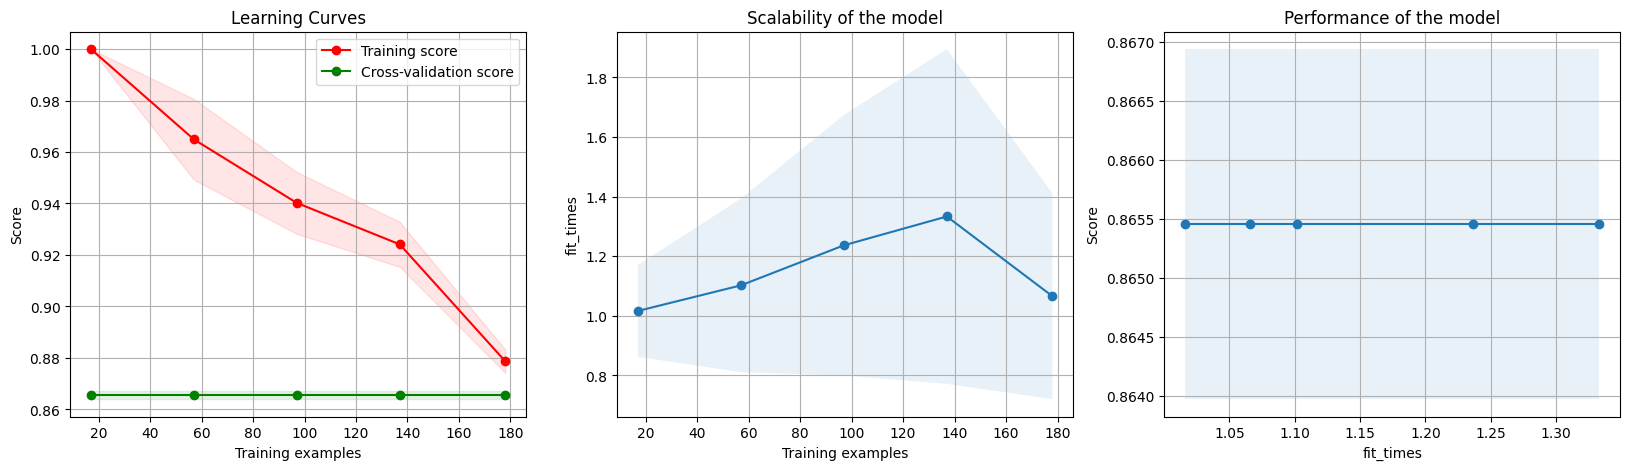

In [ ]:
m1.plot()

In [ ]:
classifier_2 = Pipeline([
        ('classifier', RandomForestClassifier()),])
param_classifier_2 = {
    'classifier__max_depth':[5,15,50,None],
    'classifier__n_estimators':[10,100,200],
    'classifier__max_features':[1,5,10,None],
    'classifier__min_samples_leaf':[1,5,10]
}

m2=module(X,y,preprocessor_1,classifier_2,param_classifier_2,sparse=False,featurize=True)

In [ ]:
feat_dict={
  'featurizer_items':[
    'count_words', # ham has not much words
    'count_characters',  # ham has not much words
    'count_characters_no_space',
    'avg_word_length',  # ham has not much words
    'count_numbers', # ham has not much words
    'count_sentences', # ham has not much words
    'noun_count',
    'aux_count',
    'verb_count',
    #'adj_count',   # both spam and ham has not much words
    'ner'
  ]
}
m2(**feat_dict)


/content/drive/MyDrive/BUAN6342/HW/Utils/CustomPreprocessorSpacy.py:83: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


Best cross-validation score: 0.71

Best parameters:  {'classifier__n_estimators': 200, 'classifier__min_samples_leaf': 1, 'classifier__max_features': 10, 'classifier__max_depth': 15}

Best estimator:  Pipeline(steps=[('classifier',
                 RandomForestClassifier(max_depth=15, max_features=10,
                                        n_estimators=200))])
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00         8

    accuracy                           1.00        56
   macro avg       1.00      1.00      1.00        56
weighted avg       1.00      1.00      1.00        56

[1. 1.]


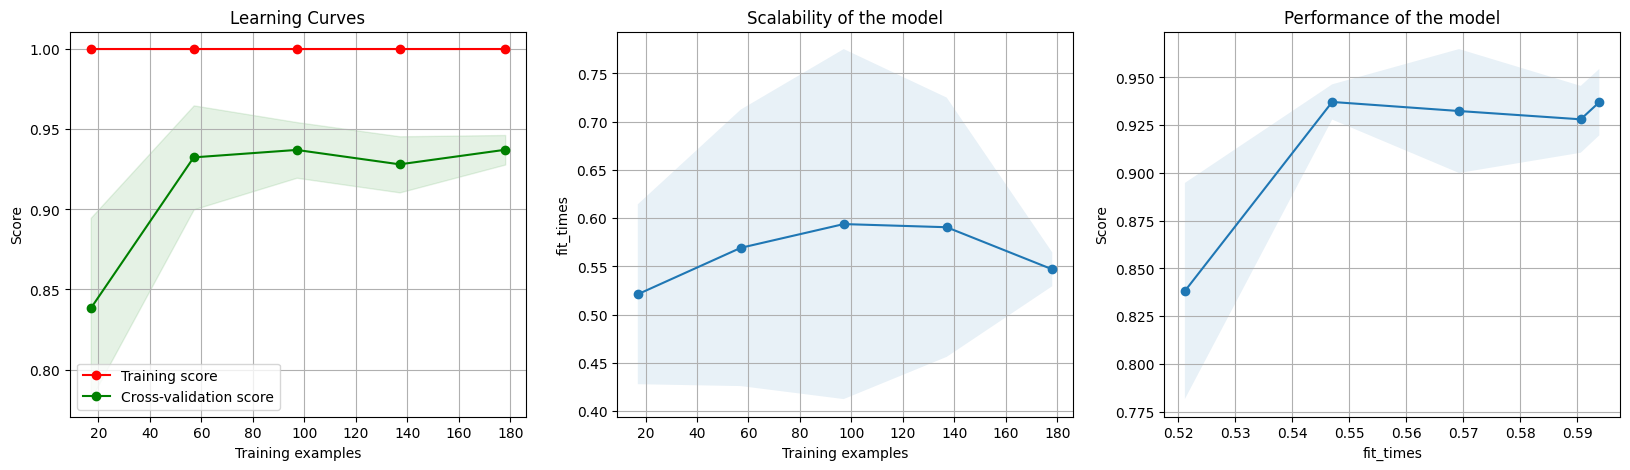

In [ ]:
m2.plot()

In [ ]:
preprocessor_1=cp.SpacyPreprocessor(model='en_core_web_sm',
                                    batch_size = 500,
                                    lower=False,  # spam has CAPITAL cases
                                    remove_email=False, # spam has email address
                                    remove_url=False,)  # spam has url data
X=df_small['message'].tolist()
y=df_small['label'].tolist()
classifier_3 = None
param_classifier_3 =None

In [ ]:
m3=module(X,y,preprocessor_1,classifier_3,param_classifier_3,sparse=True,featurize=True)

In [ ]:
X_train, X_test, y_train, y_test=m3._preprocessing()

feat_dict={
  'featurizer_items':[
    'count_words', # ham has not much words
    'count_characters',  # ham has not much words
    'count_characters_no_space',
    'avg_word_length',  # ham has not much words
    'count_numbers', # ham has not much words
    'count_sentences', # ham has not much words
    'noun_count',
    'aux_count',
    'verb_count',
    #'adj_count',   # both spam and ham has not much words
    'ner'
  ]
}
X_train,X_test=m3._feature_engineering(X_train, X_test, y_train, y_test,**feat_dict)

/content/drive/MyDrive/BUAN6342/HW/Utils/CustomPreprocessorSpacy.py:83: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


In [ ]:
class SparseTransformer(TransformerMixin, BaseEstimator):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return csr_matrix(X)


In [ ]:
sparse_features = Pipeline([('sparse', SparseTransformer()), ])
vectorizer = Pipeline([('tfidf', TfidfVectorizer(analyzer='word', token_pattern=r"[\S]+")), ])
sparse_features.fit_transform(X_train.iloc[:, 1:])
vectorizer.fit_transform(X_train.iloc[:, 0])
combined_features = ColumnTransformer(
    transformers=[
        ('tfidf', vectorizer, 'cleaned_text'),
    ], remainder=sparse_features
)
classifier_3 = Pipeline([('combined_features',  combined_features),
                         ('classifier', RandomForestClassifier()),
                         ])
param_classifier_3 = {
    'combined_features__tfidf__tfidf__max_df':[0.5, 0.6, 0.7], # ignore terms which appears more than 0.X
    'combined_features__tfidf__tfidf__ngram_range':[(1, 1), (1, 2), (1,3),],
    #'combined_features__tfidf__tfidf__min_df':[0.1,0.5,1],
    'combined_features__tfidf__tfidf__max_features': [500, 1000, 5000],
    'classifier__max_depth':[5,15,50,None],
    'classifier__n_estimators':[10,100,200],
    'classifier__max_features':[1,5,10,None],
    'classifier__min_samples_leaf':[1,5,10]
}

In [ ]:
#list(classifier_3.get_params().keys())

In [ ]:
m3=module(X,y,preprocessor_1,classifier_3,param_classifier_3,sparse=True,featurize=True)

In [ ]:
feat_dict={
  'featurizer_items':[
    'count_words',
    'count_characters',
    'count_characters_no_space',
    'avg_word_length',
    'count_numbers',
    'count_sentences',
    'noun_count',
    'aux_count',
    'verb_count',
    #'adj_count',
    'ner'
  ]
}
m3(**feat_dict)

/content/drive/MyDrive/BUAN6342/HW/Utils/CustomPreprocessorSpacy.py:83: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


Best cross-validation score: 0.65

Best parameters:  {'combined_features__tfidf__tfidf__ngram_range': (1, 3), 'combined_features__tfidf__tfidf__max_features': 1000, 'combined_features__tfidf__tfidf__max_df': 0.7, 'classifier__n_estimators': 100, 'classifier__min_samples_leaf': 5, 'classifier__max_features': None, 'classifier__max_depth': 5}

Best estimator:  Pipeline(steps=[('combined_features',
                 ColumnTransformer(remainder=Pipeline(steps=[('sparse',
                                                              SparseTransformer())]),
                                   transformers=[('tfidf',
                                                  Pipeline(steps=[('tfidf',
                                                                   TfidfVectorizer(max_df=0.7,
                                                                                   max_features=1000,
                                                                                   ngram_range=(1,
            

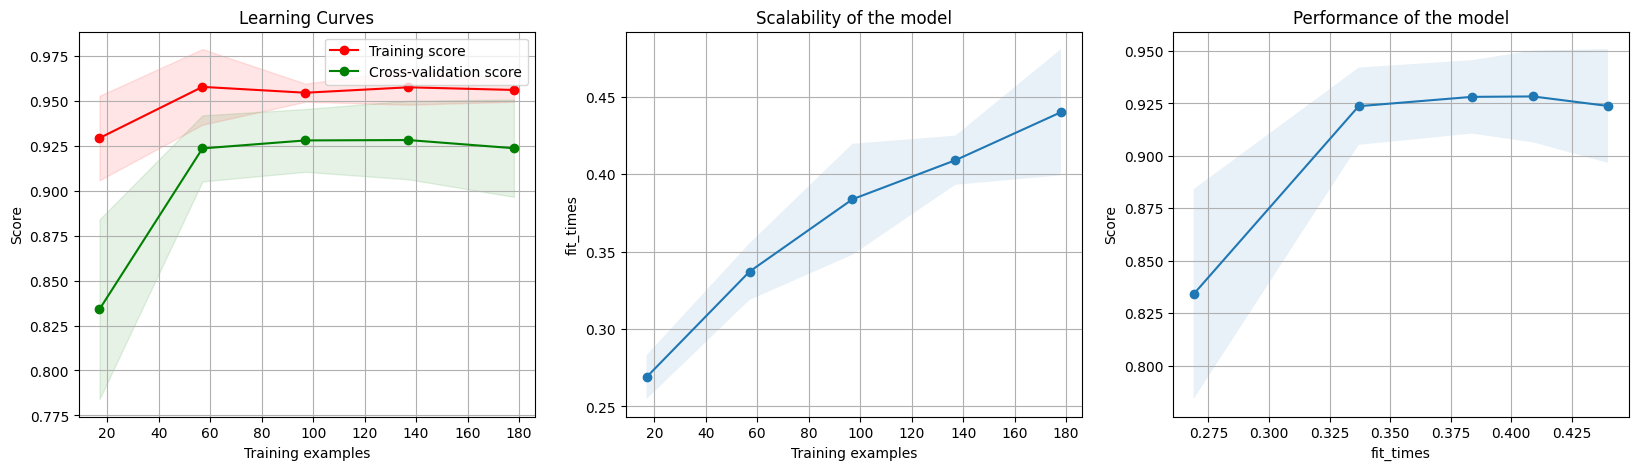

In [ ]:
m3.plot()

# Model Selection
Finally, I selected the model3.
The model 1 had a poor result.
The model 2 showed a suspicious result in its learning curve. It seemed like overfitting.
The model 3 had no overfitting and cross validation score was good.

For this small dataset, I assumed prediction score is not the most important factor because of the quantity of data.